# Fraud Data detection - Unbalanced Data

In [82]:
## import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
## metrics
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, f1_score
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification


In [83]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline


## Exploratory data analysis


In [45]:
data = pd.read_csv('fraud_data.csv', index_col=False)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [46]:
data.shape

(21693, 30)

In [47]:
ones = 100*sum(data['Class'] == 1)/data.shape[0]
zeros = 100*sum(data['Class'] == 0)/data.shape[0]
print(f"zeros: {round(zeros,2)}% , ones: {round(ones,2)}%")

zeros: 98.36% , ones: 1.64%


In [48]:
countZero = sum(data['Class']==0)
countOnes = sum(data['Class']==1)
print(f"zeros: {countZero} , ones: {countOnes}")

zeros: 21337 , ones: 356


In [49]:
data.describe().T.sort_values(ascending=0, by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color = "red").bar(subset = ["mean"], color = "blue")

,count,mean,std,min,25%,50%,75%,max
Amount,21693.000000,86.776247,235.644479,0.000000,5.370000,21.950000,76.480000,7712.430000
V11,21693.000000,0.067173,1.154227,-3.995739,-0.739193,0.005596,0.786044,12.018913
V4,21693.000000,0.057805,1.540329,-4.848504,-0.850069,-0.012868,0.772388,12.114672
V2,21693.000000,0.047565,1.690911,-40.803981,-0.592921,0.075215,0.819749,21.467203
V19,21693.000000,0.021861,0.843902,-4.395283,-0.444441,0.021719,0.484930,4.851255
Class,21693.000000,0.016411,0.127052,0.000000,0.000000,0.000000,0.000000,1.000000
V21,21693.000000,0.012471,0.850009,-21.453736,-0.225142,-0.024133,0.192954,27.202839
V22,21693.000000,0.003743,0.741348,-8.887017,-0.538258,0.007273,0.530333,8.361985
V28,21693.000000,0.003203,0.302048,-6.520075,-0.053334,0.011765,0.081749,9.876371
V26,21693.000000,0.002367,0.478279,-1.855355,-0.326141,-0.044870,0.238629,3.463246


In [50]:
## null values
data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values in the dataset

<AxesSubplot:>

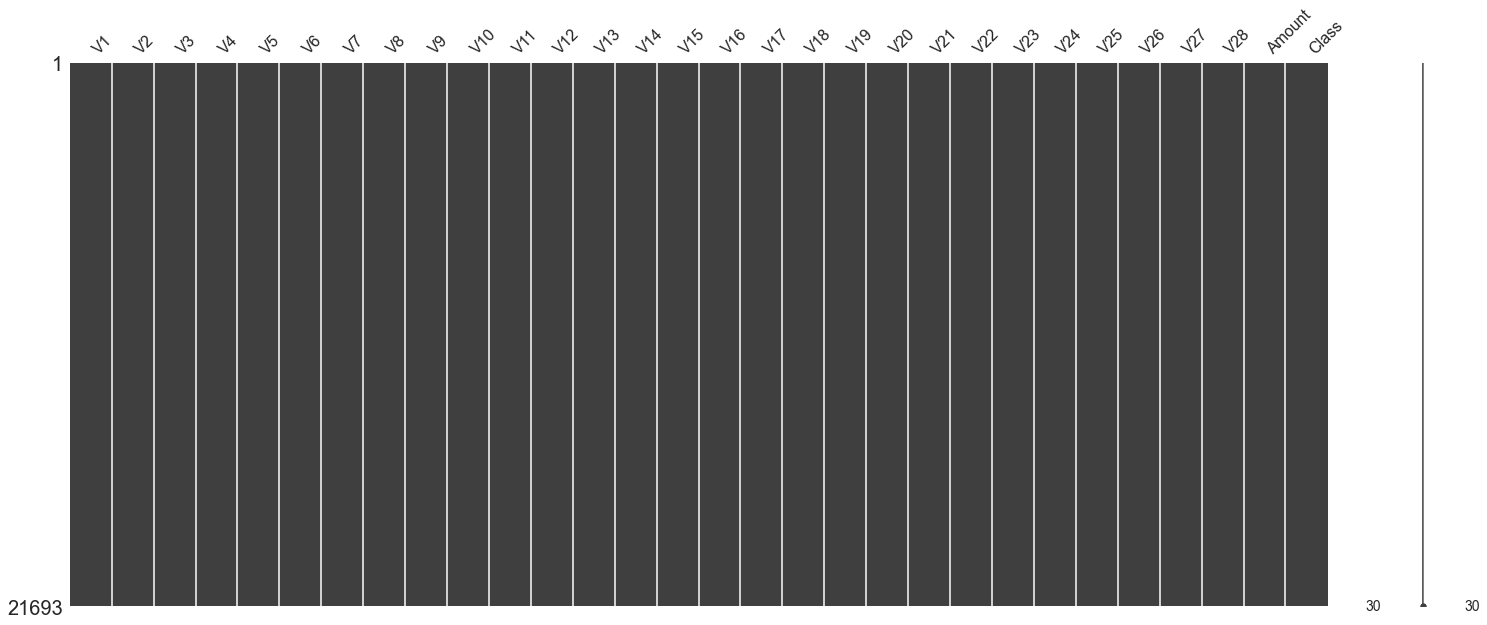

In [51]:
msno.matrix(data)

<AxesSubplot:xlabel='Class', ylabel='Count'>

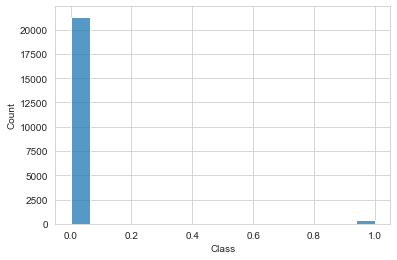

In [52]:
sns.set_style("whitegrid")
sns.histplot(data['Class'])

<AxesSubplot:>

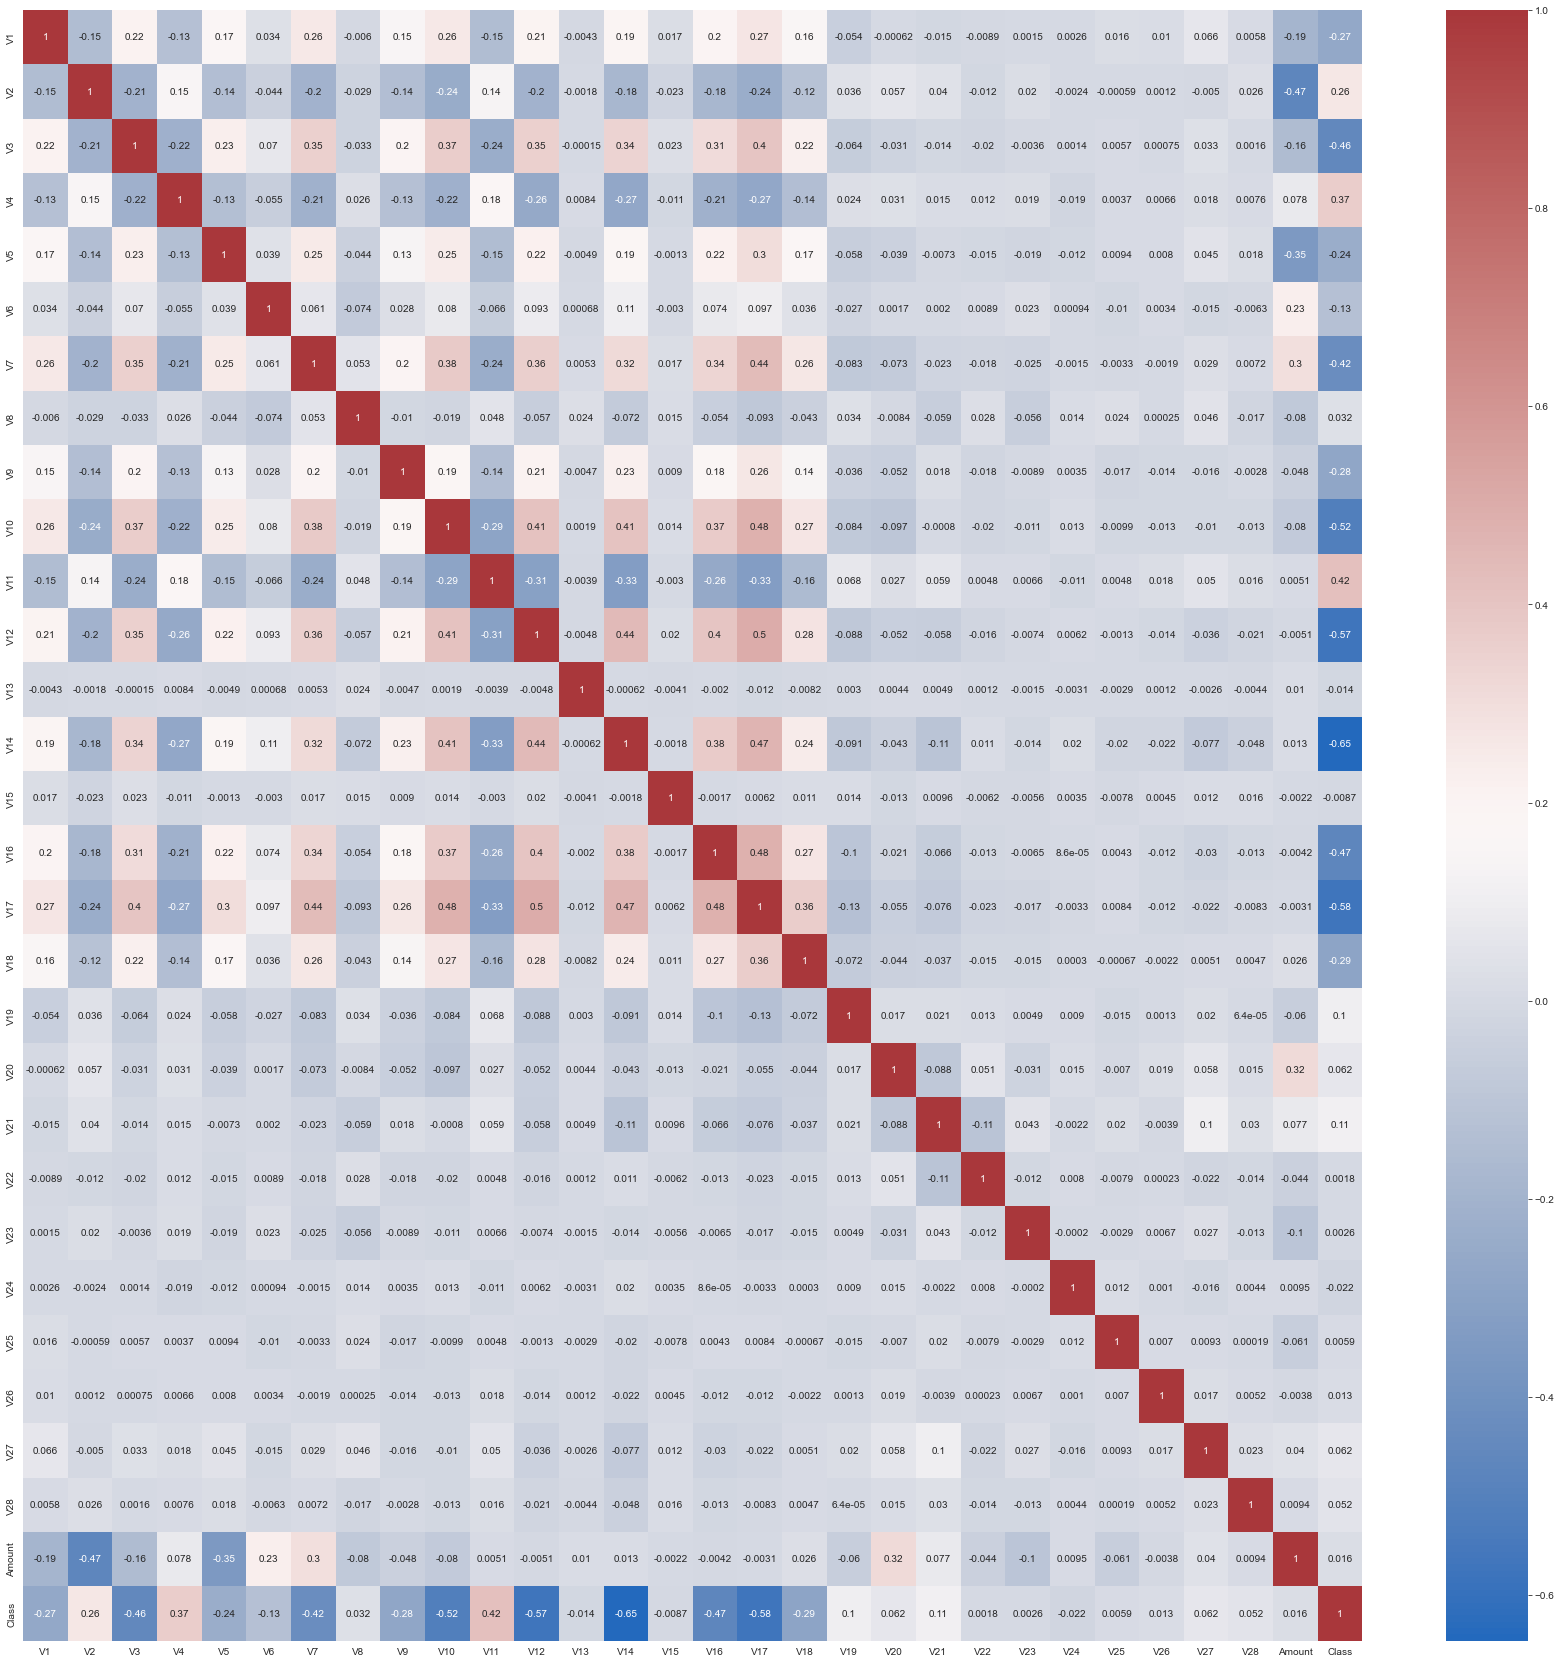

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot = True, cmap = 'vlag')

Let's define high correlation as >= 0.65.
We can see that none of the features are correlated with each other, and they are not correlated with the target value.

In [54]:
features = data.keys()
features = features.drop('Class')
data.groupby('Class')[features].mean().style

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.040014,-0.009652,0.018399,-0.015388,0.013657,-0.000988,0.013074,-0.003661,-0.002979,-0.000508,0.005216,0.006122,0.001072,0.021703,-0.002884,0.011372,0.007510,0.001765,0.010684,-0.007556,0.000171,0.003573,-0.001877,-0.000736,-0.000806,0.001588,-0.001861,0.001180,86.285312
1,-4.372754,3.476911,-6.685858,4.444649,-2.889306,-1.354927,-5.305154,0.347162,-2.521571,-5.519149,3.780586,-6.111149,-0.104912,-6.876334,-0.065811,-4.037831,-6.443529,-2.146397,0.691761,0.345523,0.749664,0.013948,0.011196,-0.104953,0.023557,0.049076,0.203794,0.124454,116.200618


## Model the data


In [64]:
X = data.copy();
X = X.drop('Class', axis = 1)
y = data['Class']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)
X_train.head
X_test.head

<bound method NDFrame.head of              V1        V2        V3        V4        V5        V6        V7  \
12869  2.164040 -0.935908 -1.714670 -1.207869 -0.137025 -0.300470 -0.524943   
1264   1.629273 -2.533048 -1.245346 -1.293683 -1.620943 -0.333123 -0.829535   
15711  1.936854 -0.335575 -1.319505  0.315835  0.003851 -0.682645  0.145510   
21003 -1.073662  1.191856  1.114801 -0.938368 -0.218299 -0.406803  0.097577   
10967  1.721193 -1.311794 -1.470353 -0.077137 -0.812410 -1.073990  0.057263   
...         ...       ...       ...       ...       ...       ...       ...   
6798  -0.508604  0.200490  2.374157 -1.293351 -1.128306 -0.521465 -0.183663   
12382  0.295417  1.412653  0.558037  4.420820  0.979112 -0.033915  1.065445   
1059  -1.462055  1.080868 -0.641806 -2.301622  0.013103 -0.695404  0.442633   
16949 -2.267097  2.495529 -1.499570 -0.833145  0.033837 -0.809007  0.070811   
17804 -0.872134  0.995123  1.262548 -0.835873  0.503138 -0.034638  0.526769   

             V8      

In this section, I will not do any resampling. Let's see what the F1, recall and precision metrics will be.


In [56]:
models = [KNeighborsClassifier(), RandomForestClassifier(), BaggingClassifier(), SVC()]
Name = []
F1 = []
Precision = []
Recall = []
for model in models:
    Name.append(type(model).__name__)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    precScore = precision_score(prediction,y_test)
    recScore = recall_score(prediction, y_test)
    F1Score = f1_score(prediction, y_test)
    F1.append(F1Score)
    Precision.append(precScore)
    Recall.append(recScore)

In [57]:
Dict = {'Name':Name,'F1':F1,'Precision':Precision,'Recall':Recall}
model_df = pd.DataFrame(Dict)
model_df

,Name,F1,Precision,Recall
0,KNeighborsClassifier,0.814815,0.696203,0.982143
1,RandomForestClassifier,0.890411,0.822785,0.970149
2,BaggingClassifier,0.884354,0.822785,0.955882
3,SVC,0.558559,0.392405,0.968750


## Resampling
In the data there are ~21,000 records, 356 are of class 1.

In [72]:
count_class_0, count_class_1 = data.Class.value_counts()

df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]


### Random Oversampling

In [90]:
kf = KFold(n_splits=5, shuffle=False)

# define parametres for hypertuning
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

from imblearn.pipeline import Pipeline, make_pipeline
imba_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=['recall', 'roc_auc','accuracy','f1'],
                        return_train_score=True, verbose=2, refit = 'roc_auc')
grid_imba.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=50, randomforestclassifier__random_state=13; total time=   1.5s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=50, randomforestclassifier__random_state=13; total time=   1.5s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=50, randomforestclassifier__random_state=13; total time=   1.5s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=50, randomforestclassifier__random_state=13; total time=   1.5s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=50, randomforestclassifier__random_state=13; total time=   1.6s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=100, randomforestclassifier__random_state=13; total time=   3.0s
[CV] END randomforestclassifier__max_depth=4, randomfore

In [91]:
res_DT = pd.DataFrame(grid_imba.cv_results_)[['params', 'mean_train_accuracy', 'mean_test_roc_auc', 'mean_test_accuracy']]\
        .sort_values('mean_test_roc_auc', ascending=False)
best_est_DT = grid_imba.best_estimator_

# check recall on validation set
print(grid_imba.best_score_)

# check recall on test set
y_test_predict = grid_imba.predict(X_test)
print(res_DT)

0.9778580732078433
                                               params  mean_train_accuracy  \
5   {'randomforestclassifier__max_depth': 6, 'rand...             0.995664   
8   {'randomforestclassifier__max_depth': 10, 'ran...             0.999193   
11  {'randomforestclassifier__max_depth': 12, 'ran...             0.999842   
4   {'randomforestclassifier__max_depth': 6, 'rand...             0.995793   
3   {'randomforestclassifier__max_depth': 6, 'rand...             0.995592   
10  {'randomforestclassifier__max_depth': 12, 'ran...             0.999827   
9   {'randomforestclassifier__max_depth': 12, 'ran...             0.999770   
2   {'randomforestclassifier__max_depth': 4, 'rand...             0.992019   
7   {'randomforestclassifier__max_depth': 10, 'ran...             0.999208   
1   {'randomforestclassifier__max_depth': 4, 'rand...             0.992466   
6   {'randomforestclassifier__max_depth': 10, 'ran...             0.999035   
0   {'randomforestclassifier__max_depth': 4, 

### Random Under-Sampling